In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"..\datafiles\50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


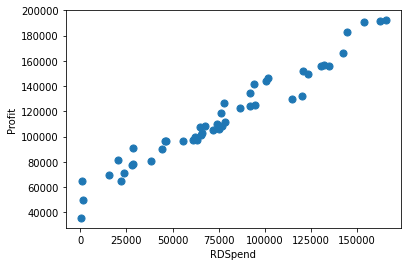

In [3]:
plt.scatter(df['RDSpend'], df['Profit'], s = 50)
plt.xlabel("RDSpend")
plt.ylabel("Profit")
plt.show()

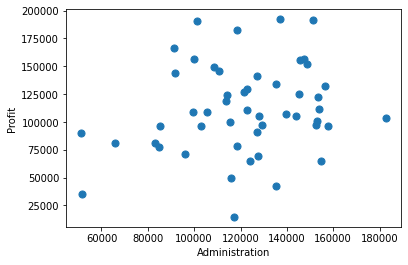

In [4]:
plt.scatter(df['Administration'], df['Profit'], s = 50)
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.show()

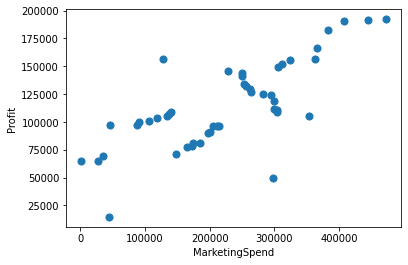

In [5]:
plt.scatter(df['MarketingSpend'], df['Profit'], s = 50)
plt.xlabel("MarketingSpend")
plt.ylabel("Profit")
plt.show()

In [6]:
df.corr()['Profit']

RDSpend           0.977401
Administration    0.200717
MarketingSpend    0.747434
Profit            1.000000
Name: Profit, dtype: float64

In [7]:
df.head(5)

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [9]:
df.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [10]:
rd_withoutna = df['RDSpend'].dropna()

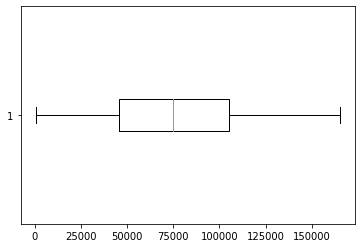

In [11]:
plt.boxplot(rd_withoutna, vert=False);

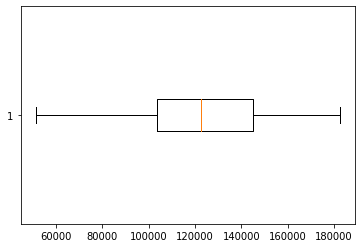

In [12]:
plt.boxplot(df['Administration'], vert=False);

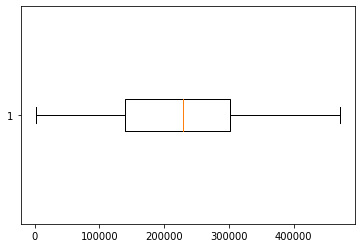

In [13]:
ms_withoutna = df['MarketingSpend'].dropna()
plt.boxplot(ms_withoutna, vert=False);

## Drop NA values

In [14]:
df.dropna(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 46
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         46 non-null     float64
 1   Administration  46 non-null     float64
 2   MarketingSpend  46 non-null     float64
 3   State           46 non-null     object 
 4   Profit          46 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


## Split Data into X and y

In [15]:
X = df.iloc[:,[0,2]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(46, 2) (46,)


## Split Data into training and testing

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
# random_State is a seed value
# you can give any seed value - doesnt matter
# To replicate the results, use the same seed value

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(36, 2) (10, 2) (36,) (10,)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([0.753328  , 0.02484504])

In [22]:
model.intercept_

52719.10866627887

## Validate the model

In [23]:
model.score(X_test, y_test)

0.9318146087527347

r2_score approx accuracy
r2_score explains the variation in the data


In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,y_pred)
#coefficient of determination) regression score function.

0.9318146087527348

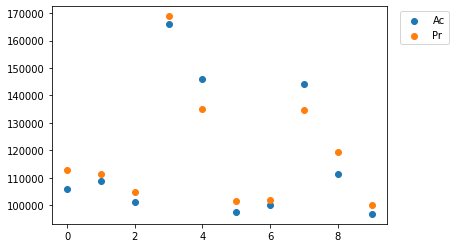

In [27]:
plt.scatter(range(len(y_test)), y_test, label = 'Ac')
plt.scatter(range(len(y_pred)), y_pred, label = 'Pr')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

In [28]:
model.coef_

array([0.753328  , 0.02484504])

In [29]:
model.intercept_

52719.10866627887

In [ ]:
# profit = 0.75*RDE + 0.025 * MS + 52719

In [33]:
#RDE = 10000, MS = 7000, 
# 12000, 
testingdata = np.array([[10000, 7000], [12000, 8000]]).reshape(-1,2)
model.predict(testingdata)

array([60426.30388233, 61957.80491107])